Task: animate the irrigated area shapefiles, and include alongside an animated timeseries of the winter rainfall (and irrigated area?). Scaling between the winter rainfall totals and irrigated area could be a problem (divide irrigation by 10^4).  
Need to rasterize the irrigated shapefiles
stack them into a timestamped xarray
match the timestamp on the winter rainfal
build a pandas array with irigated area and winter rainfall and timestamped index matching the xarray
add a shapefile with the NMDB boundaries to animation


In [2]:
# Import modules
import datacube 
from datacube.utils import geometry
import sys
import os
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import fiona

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Import external dea-notebooks functions using relative link to Scripts directory
sys.path.append('src/')
import DEADataHandling
import DEAPlotting

Firstly, lets get our pamdas dataframe sorted

In [26]:
#get our irrigated area data, and scale it so numbers are similar to rainfall anomalies
irr_area = pd.read_csv('results/nmdb_plots/csvs/NMDB_annual_area.csv')['irrigated area']
scaledIrrArea = irr_area / 10000

#load in rainfall anomaly data
rain = pd.read_csv('data/mdb_rainfall.csv')
rain = rain.drop([24,25])

dates = pd.date_range(start='1/1/1987', end='1/01/2019', freq='Y')
dates = dates.drop([pd.Timestamp('2011-12-31'), pd.Timestamp('2012-12-31')])

In [27]:
len(rain)#.head()

30

In [28]:
len(scaledIrrArea)#.head()

30

In [30]:
dates

DatetimeIndex(['1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq=None)

In [34]:
df = pd.DataFrame({'RainWint': list(rain.rain_anomaly_winter),
                   'Irr_area': list(scaledIrrArea)}, 
                    index =dates)

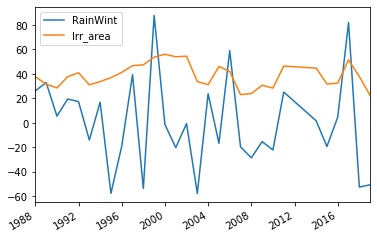

In [36]:
df.plot()

In [4]:
with fiona.open(shape_file) as shapes:
    crs = geometry.CRS(shapes.crs_wkt) 
    ShapesList = list(shapes)

first_geometry = ShapesList[polygon_Num]['geometry']
poly_name =ShapesList[polygon_Num]['properties']['name'].replace(' ','_')

geom = geometry.Geometry(first_geometry, crs=crs)

In [ ]:
# Set up datacube instance
dc = datacube.Datacube(app='Time series animation')

# Set up spatial and temporal query.
query1987_97 = {'geopolygon': geom,
         'time': ('1987-01-01', '1997-12-31')
         }

query1998_08 = {'geopolygon': geom,
         'time': ('1998-01-01', '2008-12-31')
         }

query2009_19 = {'geopolygon': geom,
         'time': ('2009-01-01', '2019-04-30')
         }

queryAllTime = {'geopolygon': geom,
         'time': ('1987-01-01', '2019-04-30')
         }

# querysentinel = {'geopolygon': geom,
#          'time': ('2015-01-01', '2019-05-30')
#          }
# querysentinel['resolution'] = (-10,10)
# querysentinel['output_crs'] = ('epsg:3577')

In [ ]:
#loading sentinel 2
# ds_sentinel = DEADataHandling.load_clearsentinel2(dc=dc, query=querysentinel, 
#                                        bands_of_interest=['nbart_red', 'nbart_green', 'nbart_blue'], 
#                                        masked_prop=0.9, mask_pixel_quality=True) 

In [ ]:
# Set the minimum proportion of clear pixels (pixels with no clouds or other nodata)
masked_prop=0.90
# Load in only clear Landsat observations with < 1% unclear values
ds_1987_97 = DEADataHandling.load_clearlandsat(dc=dc, query=query1987_97, 
                                       bands_of_interest=['red', 'green', 'blue'], 
                                       masked_prop=masked_prop) 

ds_1998_08 = DEADataHandling.load_clearlandsat(dc=dc, query=query1998_08, 
                                       bands_of_interest=['red', 'green', 'blue'], 
                                       masked_prop=masked_prop) 

ds_2009_19 = DEADataHandling.load_clearlandsat(dc=dc, query=query2009_19, 
                                       bands_of_interest=['red', 'green', 'blue'], 
                                       masked_prop=masked_prop) 

ds_allTime = DEADataHandling.load_clearlandsat(dc=dc, query=queryAllTime, 
                                       bands_of_interest=['red', 'green', 'blue'], 
                                       masked_prop=masked_prop) 

In [ ]:
# #sentinel animation
# DEAPlotting.animated_timeseries(ds=ds_sentinel, bands=['nbart_red', 'nbart_green', 'nbart_blue'],
#                                 output_path="results/" + f'{poly_name}_sentinel_animated_timeseries.gif', 
#                                 interval=500)

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_1987_97, 
                                output_path="results/" + f'{poly_name}_1987_97_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_1998_08,
                                output_path="results/" + f'{poly_name}_1998_08_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_2009_19,
                                output_path="results/"+ f'{poly_name}_2009_19_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
DEAPlotting.animated_timeseries(ds=ds_allTime,
                                output_path="results/"+ f'{poly_name}_allTime_animated_timeseries.gif', 
                                interval=500) 